In [1]:
# To find the weighted Adjacency matrix

import numpy as np
import pandas as pd

# Load the neurons and connections data
neurons_df = pd.read_csv('/Users/aj/Downloads/exported-traced-adjacencies-v1.2/traced-neurons.csv')
conn_df = pd.read_csv('/Users/aj/Downloads/exported-traced-adjacencies-v1.2/traced-total-connections.csv')

# Create a dictionary mapping body IDs to neuron indices
bodyid_to_id = {bodyid: idx for idx, bodyid in enumerate(neurons_df['bodyId'])}

# Create the adj matrix
n = len(bodyid_to_id)

adj = np.zeros((n, n), dtype=np.int32)  # Changed data type to float to store weights
for from_bodyid, to_bodyid, weight in zip(conn_df['bodyId_pre'], conn_df['bodyId_post'], conn_df['weight']):
    from_idx, to_idx = bodyid_to_id[from_bodyid], bodyid_to_id[to_bodyid]
    adj[from_idx, to_idx] = weight

# Set the row and column labels
adj_weight_df = pd.DataFrame(adj, columns=neurons_df['bodyId'], index=neurons_df['bodyId'])

# Print the adj matrix
adj_weight_df

bodyId,200326126,202916528,203253072,203253253,203257652,203594169,203594175,203598499,203598504,203598542,...,5901231246,5901231325,5901232053,6400000773,7112579848,7112579856,7112615127,7112617294,7112622044,7112622236
bodyId,,,,,,,,,,,,,,,,,,,,,
200326126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202916528,0,0,0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203253072,0,0,0,17,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
203253253,0,0,0,0,0,2,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
203257652,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7112579856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7112615127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7112617294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Adjacency matrix

import numpy as np
import pandas as pd

import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix

neurons_df = pd.read_csv('/Users/aj/Downloads/exported-traced-adjacencies-v1.2/traced-neurons.csv')
conn_df = pd.read_csv('/Users/aj/Downloads/exported-traced-adjacencies-v1.2/traced-total-connections.csv')

# Dictionary mapping 
bodyid_to_id = {bodyid: idx for idx, bodyid in enumerate(neurons_df['bodyId'])}

# Create the adj matrix
n = len(bodyid_to_id)

adj = np.zeros((n, n), dtype=np.int32)
for from_bodyid, to_bodyid in zip(conn_df['bodyId_pre'], conn_df['bodyId_post']):
    from_idx, to_idx = bodyid_to_id[from_bodyid], bodyid_to_id[to_bodyid]
    adj[from_idx, to_idx] = 1

# Row and column labels
adj_df = pd.DataFrame(adj, columns=neurons_df['bodyId'], index=neurons_df['bodyId'])

# Print the adj matrix
adj_df

bodyId,200326126,202916528,203253072,203253253,203257652,203594169,203594175,203598499,203598504,203598542,...,5901231246,5901231325,5901232053,6400000773,7112579848,7112579856,7112615127,7112617294,7112622044,7112622236
bodyId,,,,,,,,,,,,,,,,,,,,,
200326126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
202916528,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
203253072,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
203253253,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
203257652,0,1,0,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7112579856,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7112615127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
7112617294,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
import pandas as pd


# Save DataFrame as a CSV file
file_path1 = "/Users/aj/Desktop/Brain Hubs/adjacency.csv"
file_path2 = "/Users/aj/Desktop/Brain Hubs/adjacency_weighted.csv"
adj_weight_df.to_csv(file_path2, index=False)  # Set index=False to avoid saving the index as a column
adj_df.to_csv(file_path1, index=False) 


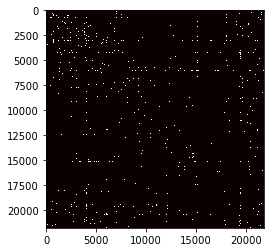

In [5]:
import numpy as np
import matplotlib.pyplot as plt


matrix = adj_df.values


plt.imshow(matrix, cmap='hot', interpolation='nearest')
plt.show()

In [ ]:
import seaborn as sns

sns.heatmap(matrix)

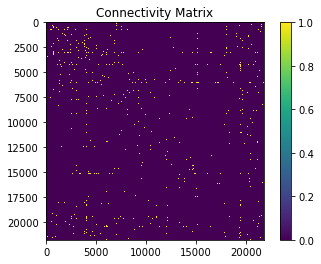

In [7]:
import numpy as np
import matplotlib.pyplot as plt


matrix1 = adj_df.values
matrix2 = adj_weight_df.values

# Create a heatmap
plt.imshow(matrix1, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Connectivity Matrix')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the connectivity matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(matrix1, cmap="viridis", linewidths=0.5, annot=False)
plt.title("Drosophila Connectome Connectivity Matrix", fontsize=16)
plt.xlabel("Target Neurons", fontsize=12)
plt.ylabel("Source Neurons", fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [15]:
# Corresponding Markov Matrix

import numpy as np
import pandas as pd

# Load the neurons and connections data
neurons_df = pd.read_csv('/Users/aj/Downloads/exported-traced-adjacencies-v1.2/traced-neurons.csv')
conn_df = pd.read_csv('/Users/aj/Downloads/exported-traced-adjacencies-v1.2/traced-total-connections.csv')

# Map body IDs to neuron indices
bodyid_to_idx = {bodyid: idx for idx, bodyid in enumerate(neurons_df['bodyId'])}

# Outdegree of each neuron
outdegree_dict = {bodyid: 0 for bodyid in bodyid_to_idx.keys()}
for from_bodyid in conn_df['bodyId_pre']:
    outdegree_dict[from_bodyid] += weight

# Markov matrix
n = len(bodyid_to_idx)

markov = np.zeros((n, n), dtype=np.float64)
for from_bodyid, to_bodyid in zip(conn_df['bodyId_pre'], conn_df['bodyId_post']):
    from_idx, to_idx = bodyid_to_idx[from_bodyid], bodyid_to_idx[to_bodyid]
    markov[from_idx, to_idx] = 1/outdegree_dict[from_bodyid]


# Row and column labels
markov_df = pd.DataFrame(markov, columns=neurons_df['bodyId'], index=neurons_df['bodyId'])

# Print the markov matrix
markov_df


bodyId,200326126,202916528,203253072,203253253,203257652,203594169,203594175,203598499,203598504,203598542,...,5901231246,5901231325,5901232053,6400000773,7112579848,7112579856,7112615127,7112617294,7112622044,7112622236
bodyId,,,,,,,,,,,,,,,,,,,,,
200326126,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
202916528,0.0,0.000000,0.0,0.007246,0.007246,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
203253072,0.0,0.000000,0.0,0.005464,0.000000,0.00000,0.005464,0.00000,0.005464,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
203253253,0.0,0.000000,0.0,0.000000,0.000000,0.00155,0.000000,0.00155,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
203257652,0.0,0.009804,0.0,0.009804,0.000000,0.00000,0.009804,0.00000,0.000000,0.009804,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7112579856,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
7112615127,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002208,0.0,0.0
7112617294,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


In [16]:
import numpy as np
import pandas as pd
from scipy.sparse.linalg import eigs

# Create the Markov matrix
markov = np.array(markov_df)
n = len(markov)

# Compute the eigenvectors and eigenvalues of the transpose of the Markov matrix
eigenvalues, eigenvectors = eigs(markov.T)

# Find the eigenvector corresponding to the eigenvalue closest to 1
idx = np.abs(eigenvalues - 1).argmin()
stationary = np.real(eigenvectors[:, idx].T / np.sum(eigenvectors[:, idx]))

# Convert the stationary distribution to a Pandas Series
stationary_df = pd.Series(stationary, index=markov_df.columns)

# Print the stationary distribution
print(stationary_df)

bodyId
200326126     0.000040
202916528     0.000069
203253072     0.000054
203253253     0.000204
203257652     0.000046
                ...   
7112579856    0.000014
7112615127    0.000021
7112617294    0.000023
7112622044    0.000179
7112622236    0.000006
Length: 21739, dtype: float64


In [17]:
# Nodes with highest probabilities in the stationary distribution
top_nodes = stationary_df.nlargest(2500)

print("Nodes with highest probabilities in stationary distribution:")
print(top_nodes)

Nodes with highest probabilities in stationary distribution:
bodyId
329566174     0.000864
423101189     0.000832
425790257     0.000778
5813105172    0.000706
393766777     0.000698
                ...   
5812982924    0.000099
800618162     0.000099
1068302710    0.000099
5813040190    0.000099
1072874511    0.000099
Length: 2500, dtype: float64


In [ ]:
#Connectivity matrix and heat map

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your adjacency matrix data 
# Replace 'adjacency_matrix.csv' with your actual file path or DataFrame source
adj_df = pd.DataFrame(adj)  # or load via adj_df = pd.read_csv('adjacency_matrix.csv')

# Step 1: Generate Connectivity Matrix (if it's not binary, normalize values)
connectivity_matrix = adj_df.copy()

# Optional: Normalize to create a weighted matrix (for visualization purposes)
# This step is only needed if you want to represent weighted connections in a heat map
row_sums = connectivity_matrix.sum(axis=1)
connectivity_matrix = connectivity_matrix.div(row_sums, axis=0).fillna(0)

# Step 2: Plot Heat Map
plt.figure(figsize=(10, 8))
sns.heatmap(connectivity_matrix, cmap='viridis', cbar=True)
plt.title('Connectivity Matrix Heat Map')
plt.xlabel('Nodes')
plt.ylabel('Nodes')
plt.show()


In [4]:
#Download adjaceny matrix as csv file

file_path = '/Users/aj/Downloads/adjacency_matrix.csv'  # Define the output path
adj_df.to_csv(file_path, index=True)